In [54]:
import pandas as pd
import json
from os import walk
import os
%matplotlib inline

In [10]:
datapath = '/Users/nathanhelm-burger/Documents/Dropbox/Stats_Programming/botcatcher_data/datanew/'

In [11]:
allfiles = []
for (dirpath, dirnames, filenames) in walk(datapath):
  allfiles = allfiles+filenames
  break



In [13]:
if '.DS_Store' in allfiles:
  allfiles.pop(allfiles.index('.DS_Store'))
  
print('number of files', len(allfiles))

number of files 108


In [19]:
df = pd.DataFrame()
for filename in allfiles:
  temp_df = pd.read_json(datapath + filename)
  df = df.append(temp_df)

In [20]:
print(df.head())


  permalink                                          snapshots  \
0     JE4yg  [{'dnv': '3', 'views': 0, 'time': '1475774950....   
1     boEgG  [{'dnv': '4', 'views': 0, 'time': '1475774950....   
2     GWHg5  [{'dnv': '3', 'views': 0, 'time': '1475774950....   
3     XW1X1  [{'dnv': '1', 'views': 0, 'time': '1475774950....   
4     j5A4q  [{'dnv': '0', 'views': 0, 'time': '1475774950....   

                      title   type  
0         Star Lord beckons  album  
1              No one knows  album  
2  birthday lol skin agario  album  
3                   getrekt  album  
4               High Score!  album  


In [21]:
print(df.columns)

Index(['permalink', 'snapshots', 'title', 'type'], dtype='object')


In [24]:
grouped = df.groupby('permalink')

In [26]:
print(len(grouped), len(df))


3653 84180


In [47]:
subset = grouped.filter(lambda x: len(x) > 20).groupby('permalink')

In [29]:
len(subset.groupby('permalink'))

2139

In [56]:
one_post = subset.get_group('JE4yg')


In [60]:
new_df = pd.DataFrame(one_post['snapshots'])

#one_post.plot.line()

  dnv               time upv  views
0   3  1475774950.765116   1      0


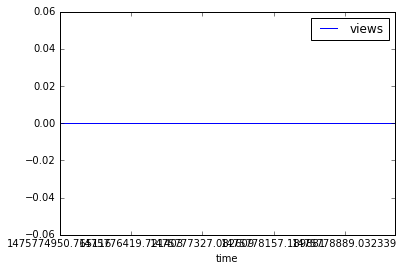

In [80]:
flat_snapshots = []
for doc in one_post['snapshots']:
  flat_snapshots += doc

new_df = pd.DataFrame(flat_snapshots)
print(new_df.head(1))
new_df.plot.line(x='time', y='views')


TypeError: Empty 'DataFrame': no numeric data to plot